In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks


Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
#updating to the latest tweepy
!pip uninstall tweepy
!pip install vaderSentiment
!pip install tweepy

Found existing installation: tweepy 3.10.0
Uninstalling tweepy-3.10.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/tweepy-3.10.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tweepy/*
Proceed (y/n)? y
  Successfully uninstalled tweepy-3.10.0
     |████████████████████████████████| 125 kB 16.1 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import tweepy
import datetime
import pandas as pd
import numpy as np
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initializing the API keys for twitter API

In [ ]:
consumer_key = "RiOXO1ftjhag0RlYlc8SSNjcC"
consumer_key_secret = "sHm12PWU1UEs5bfzYi0yn3tK0PpYVyaSloyjeRFQaCQPWaeAx5"
access_token = "1518770620934152192-YQiBTvsrVL086vVDKs4deypOalvKiB"
access_token_secret = "dV8d4XgQu60r9FbLjy3CibFsCWwjVJy7lO3JHJQfQ9Slg"
Bearer_Token="AAAAAAAAAAAAAAAAAAAAAE8pcAEAAAAA60TYToxJMKE%2FH7kx81ACPN3JM0o%3DwUZRWCXng4z6y6u1B5qKGVLq1uIcc3gZNlYT2hKwJZLXzstN22"

In [ ]:
twitter_auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
twitter_auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(twitter_auth,wait_on_rate_limit=True)

In [ ]:
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)

# Acquiring the tweets using Tweepy

In [ ]:
# uncommented for the purpose of code reruns
"""tweets_list = tweepy.Cursor(api.search_tweets, q="Elon Musk since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended', lang='en').items()
#df = pd.read_csv("output.csv")
#due to limitation only certain number tweets can be obtained
analyzer = SentimentIntensityAnalyzer()
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    ps = analyzer.polarity_scores(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    author=tweet.author
    user=tweet.user
    
    line = {'Author': author, 'User':user,'text' : text, 'Polarity' : ps['compound'], 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)
df = pd.DataFrame(output)
df.shape
dfs=df[['text','Polarity','favourite_count','retweet_count']]
dfs.head()
def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return 'neg'
    if(x == 0):
        return 'neutral'
    if(x > 0 and x <= 1):
        return 'pos'
dfs.Polarity = dfs.Polarity.apply(polarity_to_label)
dfs.head(10)
dfs.to_csv('ElonMusks0.csv')
dfs.shape
dfs.Polarity.value_counts()"""

'tweets_list = tweepy.Cursor(api.search_tweets, q="Elon Musk since:" + str(yesterday)+ " until:" + str(today),tweet_mode=\'extended\', lang=\'en\').items()\n#df = pd.read_csv("output.csv")\n#due to limitation only certain number tweets can be obtained\nanalyzer = SentimentIntensityAnalyzer()\noutput = []\nfor tweet in tweets_list:\n    text = tweet._json["full_text"]\n    ps = analyzer.polarity_scores(text)\n    favourite_count = tweet.favorite_count\n    retweet_count = tweet.retweet_count\n    created_at = tweet.created_at\n    author=tweet.author\n    user=tweet.user\n    \n    line = {\'Author\': author, \'User\':user,\'text\' : text, \'Polarity\' : ps[\'compound\'], \'favourite_count\' : favourite_count, \'retweet_count\' : retweet_count, \'created_at\' : created_at}\n    output.append(line)\ndf = pd.DataFrame(output)\ndf.shape\ndfs=df[[\'text\',\'Polarity\',\'favourite_count\',\'retweet_count\']]\ndfs.head()\ndef polarity_to_label(x):\n    if(x >= -1 and x < 0):\n        return \

# Reading the acquired data 

In [ ]:
#after removing the duplicates and reviewing the labels
dfm=pd.read_csv("ElonMusks.csv")
dfm.shape

(762, 5)

In [ ]:

dfm.Polarity.value_counts()

pos        289
neg        247
neutral    226
Name: Polarity, dtype: int64

In [ ]:
dfm=dfm[['text','Polarity','favourite_count','retweet_count']]
dfm.to_csv('ElonMusks.csv')

# WordCloud for the data

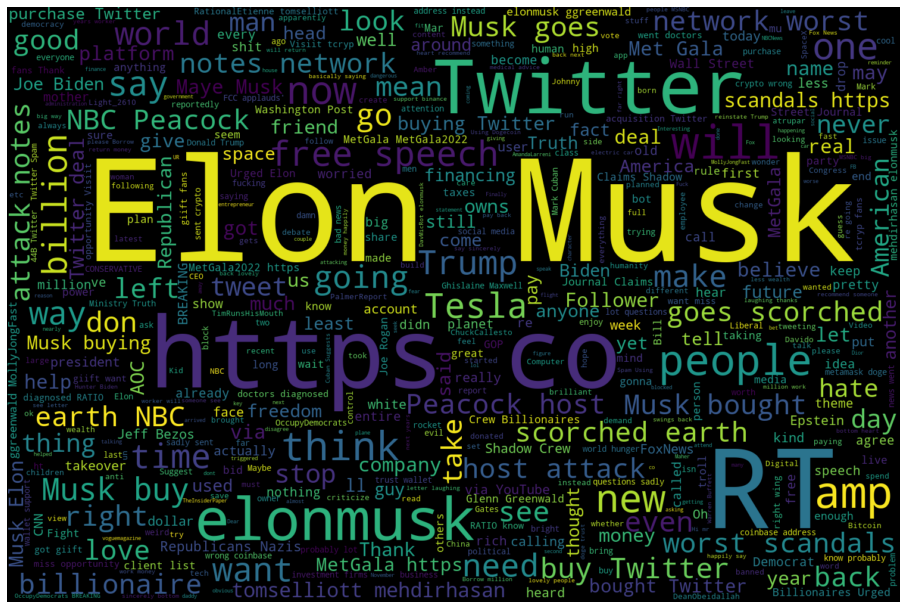

In [ ]:
# wordcloud generation
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(dfm['text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tools

In [ ]:
!pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 12.1 MB/s 
     |████████████████████████████████| 462 kB 55.0 MB/s 


In [ ]:
import io
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
columns = ['text','Polarity','favourite_count','retweet_count']
data = pd.read_csv("ElonMusks.csv")

In [ ]:
df=data[["text","Polarity"]]

In [ ]:
df.head(2)

,text,Polarity
0,RT @DeanObeidallah: I love immigrants but how ...,neg
1,SPREEN STOP DEFENDING ELON MUSK ON UR STREAM O...,neg


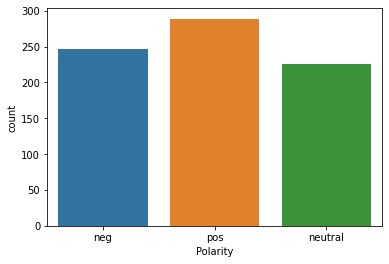

In [ ]:
sns.countplot(x="Polarity",data=df)

In [224]:
#Filtering the text

import nltk
import string
from tqdm import tqdm
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

dfs = df.copy()
original_df=df.copy()

In [225]:
dfs=dfs[['text','Polarity']]

In [226]:
dfs

,text,Polarity
0,rt @deanobeidallah: i love immigrants but how ...,neg
1,spreen stop defending elon musk on ur stream o...,neg
2,"like this, if you love elon musk😂",pos
3,rt @sentedcruz: in the same week that we got g...,pos
4,elon musk arrived to the met. #metgala #metgal...,neutral
...,...,...
757,why elon musk’s recent investing advice sounds...,pos
758,"rt @_d3kr_: on the issue of crypto, who are yo...",neutral
759,rt @krangtnelson: i'm sure elon musk and i wou...,neg
760,rt @wrong_speak: there are people who legit th...,neg


In [227]:
#basic preprocessing
def preprocessor(text):
    text = text.lower()
    text = ''.join([i for i in text if i in string.ascii_lowercase+' '])
    text = ' '.join([PorterStemmer().stem(word) for word in text.split()])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [228]:
for i in tqdm(range(dfs.shape[0])):
    dfs.loc[i,'processtext'] = preprocessor(dfs['text'][i])

100%|██████████| 762/762 [00:02<00:00, 347.46it/s]


In [229]:
dfs.shape

(762, 3)

In [230]:
dfs.head()

,text,Polarity,processtext
0,rt @deanobeidallah: i love immigrants but how ...,neg,rt deanobeidallah love immigr rupert murdoch e...
1,spreen stop defending elon musk on ur stream o...,neg,spreen stop defend elon musk ur stream leav u ...
2,"like this, if you love elon musk😂",pos,like thi love elon musk
3,rt @sentedcruz: in the same week that we got g...,pos,rt sentedcruz week got good news free speech e...
4,elon musk arrived to the met. #metgala #metgal...,neutral,elon musk arriv met metgala metgala


In [231]:
target='Polarity'

In [255]:
#Tokenization and feature extraction
from sklearn.feature_extraction.text import TfidfVectorizers
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True,max_features=50)
y=dfs[target].values
x=tfidf.fit_transform(dfs.processtext)

In [256]:
x.shape

(762, 50)

            Target Variable Distribution           


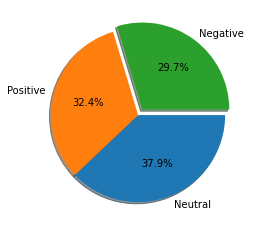

In [ ]:
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(dfs[target].value_counts(), labels=['Neutral','Positive','Negative'], counterclock=False, shadow=True, 
        explode=[0,0,0.08], autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [215]:
df2

,text,Polarity,processtext,review_length
0,RT @DeanObeidallah: I love immigrants but how ...,neg,rt deanobeidallah love immigr rupert murdoch e...,140
1,SPREEN STOP DEFENDING ELON MUSK ON UR STREAM O...,neg,spreen stop defend elon musk ur stream leav u ...,147
2,"Like this, if you love Elon Musk😂 https://t.co...",pos,like thi love elon musk httpstcojyqjsacck,57
3,RT @SenTedCruz: In the same week that we got g...,pos,rt sentedcruz week got good news free speech e...,140
4,Elon Musk arrived to the Met. #MetGala #MetGal...,neutral,elon musk arriv met metgala metgala httpstcoee...,76
...,...,...,...,...
757,Why Elon Musk’s recent investing advice sounds...,pos,whi elon musk recent invest advic sound like w...,92
758,"RT @_D3KR_: On the issue of crypto, who are yo...",neutral,rt dkr issu crypto go listen incoher rambl war...,139
759,RT @KrangTNelson: i'm sure elon musk and i wou...,neg,rt krangtnelson im sure elon musk would disagr...,140
760,RT @wrong_speak: There are people who legit th...,neg,rt wrongspeak peopl legit think elon musk isnt...,140


100%|██████████| 762/762 [00:00<00:00, 2151.10it/s]


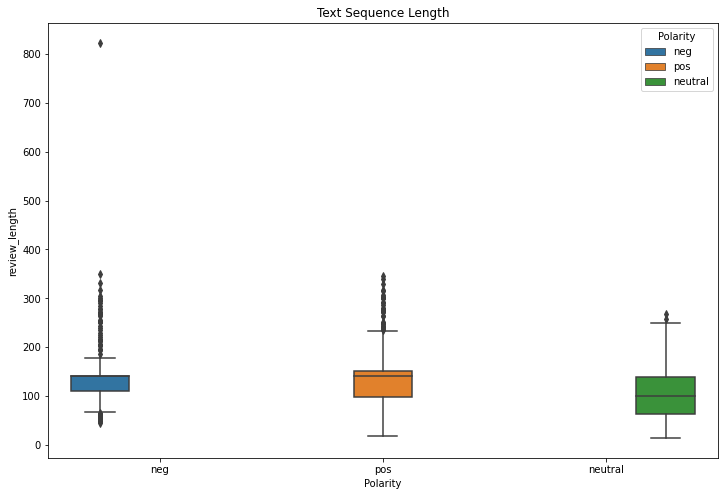

In [ ]:
df2 = dfs.copy()
df2['review_length'] = 0

for i in tqdm(range(dfs.shape[0])):
    df2['review_length'][i] = len(df2['text'][i])

plt.figure(figsize=[12,8])
sns.boxplot(x=target,y='review_length', data=df2, hue=target)
plt.title('Text Sequence Length')
plt.show()

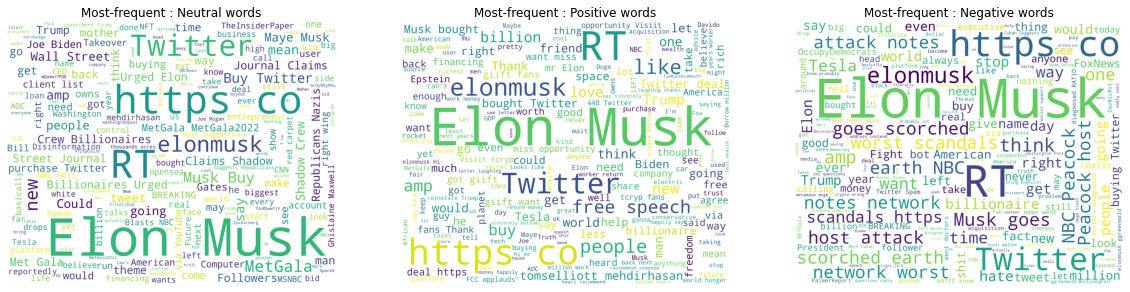

In [ ]:

neutraldata = original_df[original_df[target]=='neutral']
neutraldata= neutraldata['text']
positivedata = original_df[original_df[target]=='pos']
positivedata =positivedata['text']
negdata = original_df[original_df[target]== 'neg']
negdata = negdata['text']


def wordcloud_draw(data, color, s):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
    wordcloud = WordCloud(stopwords=stopwords.words('english'),background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.imshow(wordcloud)
    plt.title(s)
    plt.axis('off')

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
wordcloud_draw(neutraldata,'white','Most-frequent : Neutral words')

plt.subplot(1,3,2)
wordcloud_draw(positivedata,'white','Most-frequent : Positive words')

plt.subplot(1,3,3)
wordcloud_draw(negdata, 'white','Most-frequent : Negative words')
plt.show()

In [ ]:
MAP={'neg':0, 'neutral':1, 'pos':2}
dfs.Polarity = dfs.Polarity.map(MAP)

In [ ]:
dfs.head(2)

,text,Polarity,processtext
0,RT @DeanObeidallah: I love immigrants but how ...,0,rt deanobeidallah love immigr rupert murdoch e...
1,SPREEN STOP DEFENDING ELON MUSK ON UR STREAM O...,0,spreen stop defend elon musk ur stream leav u ...


In [235]:
x.shape

(762, 2993)

In [257]:
X = x
Y = pd.Series(y).map(MAP)
MAP={'neg':0, 'neutral':1, 'pos':2}
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,len(Y),'\nTraining set  ---> ',Train_X.shape,len(Train_Y),'\nTesting set   ---> ', Test_X.shape,'', len(Test_Y))

Original set  --->  (762, 50) 762 
Training set  --->  (609, 50) 609 
Testing set   --->  (153, 50)  153


In [237]:
X.shape

(762, 2993)

In [ ]:
Evaluation_Results = pd.DataFrame(np.zeros((4,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0


In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score

In [ ]:

from scikitplot.metrics import plot_roc_curve as auc_roc

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 44.4%
F1 Score = 44.2%

 Confusiton Matrix:
 [[21 18 26]
 [ 5 16 14]
 [ 8 14 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.32      0.42        65
           1       0.33      0.46      0.39        35
           2       0.44      0.58      0.50        53

    accuracy                           0.44       153
   macro avg       0.46      0.46      0.44       153
weighted avg       0.49      0.44      0.44       153



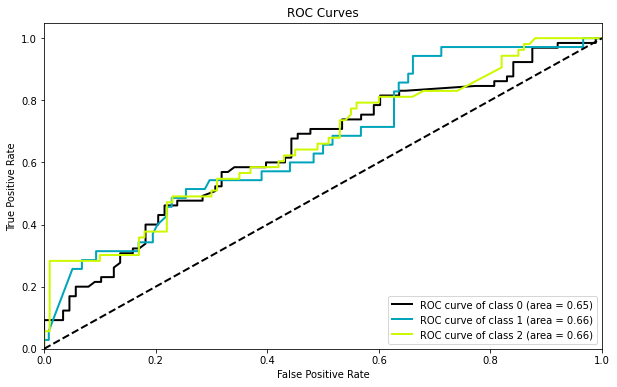

In [258]:
LR_model = LogisticRegression()
LR = LR_model.fit(Train_X, Train_Y)
pred = LR.predict(Test_X)
pred_prob = LR.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,0)

In [201]:
import pickle
import joblib



In [260]:
pickle.dump(LR, open('LRmodel.pkl','wb'))


In [180]:
pickle.dump(LR_model, open('LRmodel1.pkl','wb'))

In [262]:
model = open("LRmodel.pkl","rb")
classifier = pickle.load(model)

In [263]:
prediction=classifier.predict(X)

In [244]:
prediction = classifier.predict(Test_X)

In [190]:
prediction

array([0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1,
       0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2,
       0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [172]:
sad=tfidf.fit_transform(df.text)

In [178]:
Test_X

<153x3257 sparse matrix of type '<class 'numpy.float64'>'
	with 1947 stored elements in Compressed Sparse Row format>

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 45.1%
F1 Score = 45.2%

 Confusiton Matrix:
 [[27 22 16]
 [ 7 22  6]
 [14 19 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.42      0.48        65
           1       0.35      0.63      0.45        35
           2       0.48      0.38      0.42        53

    accuracy                           0.45       153
   macro avg       0.46      0.47      0.45       153
weighted avg       0.48      0.45      0.45       153



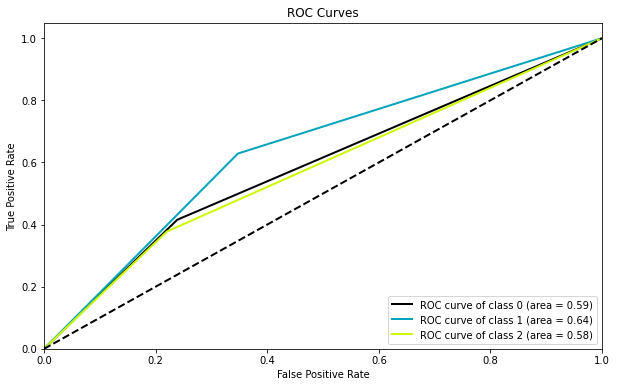

In [ ]:
DT_model = DecisionTreeClassifier()
DT = DT_model.fit(Train_X, Train_Y)
pred = DT.predict(Test_X)
pred_prob = DT.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,1)

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 51.6%
F1 Score = 52.1%

 Confusiton Matrix:
 [[30 12 23]
 [ 5 22  8]
 [ 7 19 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.46      0.56        65
           1       0.42      0.63      0.50        35
           2       0.47      0.51      0.49        53

    accuracy                           0.52       153
   macro avg       0.53      0.53      0.52       153
weighted avg       0.56      0.52      0.52       153



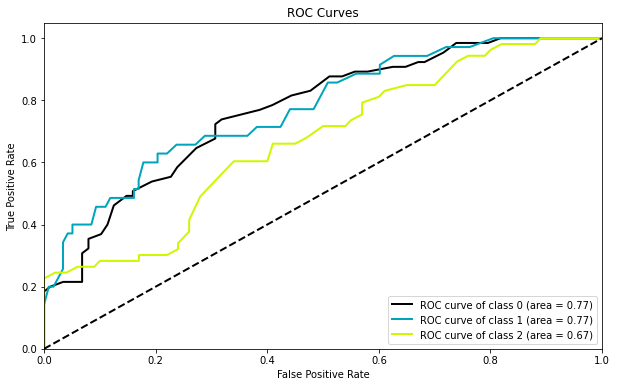

In [ ]:
RF_model = RandomForestClassifier()
RF = RF_model.fit(Train_X, Train_Y)
pred = RF.predict(Test_X)
pred_prob = RF.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,2)

In [193]:
pickle.dump(RF_model, open('RFmodel.pkl','wb'))

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 47.099999999999994%
F1 Score = 44.1%

 Confusiton Matrix:
 [[14 25 26]
 [ 0 29  6]
 [ 5 19 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.22      0.33        65
           1       0.40      0.83      0.54        35
           2       0.48      0.55      0.51        53

    accuracy                           0.47       153
   macro avg       0.54      0.53      0.46       153
weighted avg       0.57      0.47      0.44       153



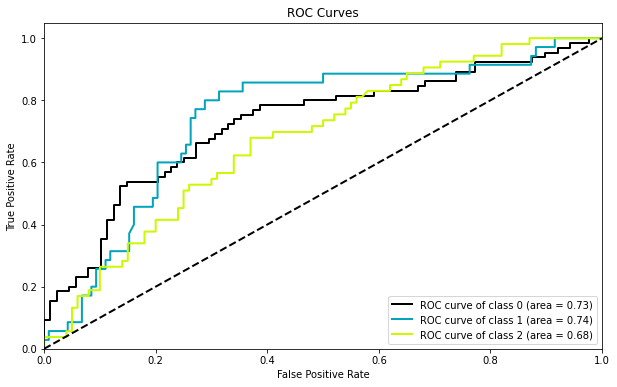

In [ ]:
NB_model = BernoulliNB()
NB = NB_model.fit(Train_X, Train_Y)
pred = NB.predict(Test_X)
pred_prob = NB.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,3)

In [ ]:
from IPython.display import display
import math

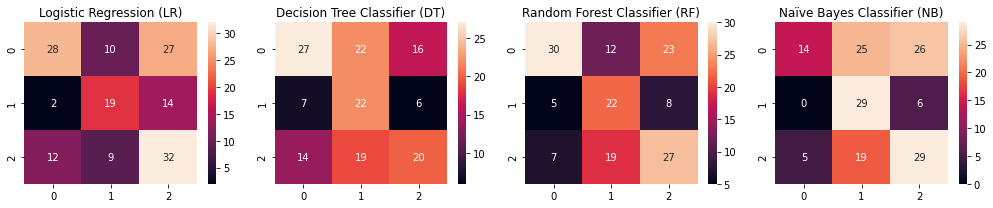

In [157]:
labels=['Positive','Negative','Neutral']
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[14,3*math.ceil(len([all_models])/4)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(1,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/2),2,i+1)
        pred = all_models[i].predict(Test_X)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, fmt='.0f') #vmin=0,vmax=5,cmap='BuGn'
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB])

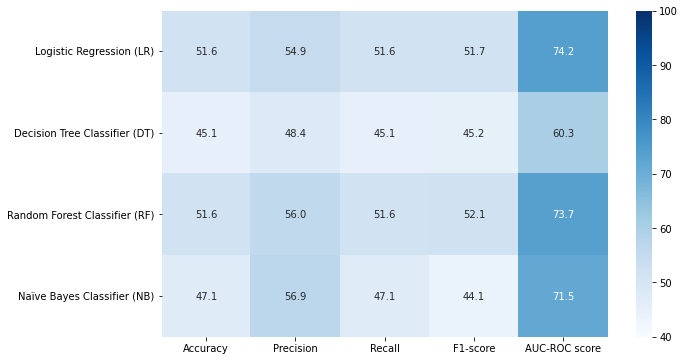

In [ ]:
sns.heatmap(Evaluation_Results, annot=True, vmin=40, vmax=100.0, cmap='Blues', fmt='.1f')
plt.show()

# Next

In [ ]:
"""def label_to_polarity(x):
    if(x =='neg'):
        return -1
    if(x == "neutral"):
        return 0
    if(x =="pos"):
        return 1
df.Polarity = df.Polarity.apply(label_to_polarity)"""

'def label_to_polarity(x):\n    if(x ==\'neg\'):\n        return -1\n    if(x == "neutral"):\n        return 0\n    if(x =="pos"):\n        return 1\ndf.Polarity = df.Polarity.apply(label_to_polarity)'

In [ ]:
sentences=df.text

# approach2


In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
#df["text"] = df["text"].str.replace("\d","")

In [ ]:
df['text']

0      RT @DeanObeidallah: I love immigrants but how ...
1      SPREEN STOP DEFENDING ELON MUSK ON UR STREAM O...
2      Like this, if you love Elon Musk😂 https://t.co...
3      RT @SenTedCruz: In the same week that we got g...
4      Elon Musk arrived to the Met. #MetGala #MetGal...
                             ...                        
757    Why Elon Musk’s recent investing advice sounds...
758    RT @_D3KR_: On the issue of crypto, who are yo...
759    RT @KrangTNelson: i'm sure elon musk and i wou...
760    RT @wrong_speak: There are people who legit th...
761    RT @sayitnspinit: Elon Musk is doing to Twitte...
Name: text, Length: 762, dtype: object

In [ ]:
"""def cleaner(data):
    # Tokens
    tokens = word_tokenize(str(data).replace("'", "").lower()) 
    
    # Remove Puncs
    without_punc = [w for w in tokens if w.isalpha()]
    
    # Stopwords
    without_sw = [t for t in without_punc if t not in stop_words]
    
    # Lemmatize
    text_len = [WordNetLemmatizer().lemmatize(t) for t in without_sw]
    # Stem
    text_cleaned = [PorterStemmer().stem(w) for w in text_len]
    
    return " ".join(text_cleaned)
df["text"] = df["text"].apply(cleaner)
df["text"].head()"""

'def cleaner(data):\n    # Tokens\n    tokens = word_tokenize(str(data).replace("\'", "").lower()) \n    \n    # Remove Puncs\n    without_punc = [w for w in tokens if w.isalpha()]\n    \n    # Stopwords\n    without_sw = [t for t in without_punc if t not in stop_words]\n    \n    # Lemmatize\n    text_len = [WordNetLemmatizer().lemmatize(t) for t in without_sw]\n    # Stem\n    text_cleaned = [PorterStemmer().stem(w) for w in text_len]\n    \n    return " ".join(text_cleaned)\ndf["text"] = df["text"].apply(cleaner)\ndf["text"].head()'

In [ ]:
rare_words = pd.Series(" ".join(df["text"]).split()).value_counts()
rare_words

Elon              598
Musk              476
the               395
RT                366
to                343
                 ... 
@4TaxFairness:      1
badly               1
income              1
tax.                1
credentialis…       1
Length: 5317, dtype: int64

In [ ]:
rare_words = rare_words[rare_words <= 2]

In [ ]:
rare_words

done              2
limit             2
Do                2
Minister          2
@                 2
                 ..
@4TaxFairness:    1
badly             1
income            1
tax.              1
credentialis…     1
Length: 4545, dtype: int64

In [ ]:
main = []

# Storing all punctuations using RE library like !;,"% etc
re_puncs = re.compile('[%s]' % re.escape(string.punctuation))
# Storing all stop words like a, an, the, when, there, this etc
stop_word  = set(stopwords.words('english'))
# Making Lemmatizing object
lem = WordNetLemmatizer()
# Using Porter Stemmer
p_stem = PorterStemmer()

# Traversing whole dataset
for i in tqdm(range(len(df['text']))):
    # Tokenization
    tokens = word_tokenize(str(df['text'][i]))
    # Converting all characters to lower case
    tokens = [w.lower() for w in tokens]
    # Remove all punctuations from sentenses
    tokens = [re_puncs.sub('', w) for w in tokens]
    # Checking all words is alphabets or not
    tokens = [i for i in tokens if i.isalpha()]
    # Removing all stop words from the sentenses
    tokens = [w for w in tokens if w not in stop_word]
    # Doing Lemmatizing of words
    tokens = [lem.lemmatize(w) for w in tokens]
    # Stemming process
    tokens = [p_stem.stem(w) for w in tokens]
    # Finally convert to string
    r = ' '.join(tokens)
    # Storing the final string into main list
    main.append(r)

100%|██████████| 762/762 [00:03<00:00, 253.15it/s]


In [ ]:
main

['rt deanobeidallah love immigr rupert murdoch elon musk becom u citizen peddler toxic b',
 'spreen stop defend elon musk ur stream leav u one le viewer also ur import viewer dont',
 'like love elon http',
 'rt sentedcruz week got good news free speech elon musk buy twitter biden administr launch',
 'elon musk arriv met metgala http',
 'rt paulmitchellab elon musk ask ghislain maxwel client list nt shi away danger topic interest',
 'amplifi harm content profit seriou consequ give disproportion polit power extrem voic amp enabl bad actor suppress voic harass disagre http',
 'rt etnow elon musk brought mom may musk date metgala getti imag http',
 'rt cbouzi coupl flight use homophob slur woman start prais wait elon musk day',
 'rt theinsiderpap elon musk take shot nbc http',
 'rt dtmwoodwork head comment elon musk tweet even sarcast bring bot liter prob bot',
 'rt palmerreport fact elon musk keep repli favor glenn greenwald best argument yet elon musk',
 'convo happen elon musk twitter e

In [ ]:
df['preprocess'] = main

In [ ]:
df.head(10)

,text,Polarity,preprocess
0,RT @DeanObeidallah: I love immigrants but how ...,neg,rt deanobeidallah love immigr rupert murdoch e...
1,SPREEN STOP DEFENDING ELON MUSK ON UR STREAM O...,neg,spreen stop defend elon musk ur stream leav u ...
2,"Like this, if you love Elon Musk😂 https://t.co...",pos,like love elon http
3,RT @SenTedCruz: In the same week that we got g...,pos,rt sentedcruz week got good news free speech e...
4,Elon Musk arrived to the Met. #MetGala #MetGal...,neutral,elon musk arriv met metgala http
5,RT @PaulMitchell_AB: Elon Musk is asking about...,neutral,rt paulmitchellab elon musk ask ghislain maxwe...
6,“Amplifying harmful content for profit has ser...,neg,amplifi harm content profit seriou consequ giv...
7,RT @etnow: Elon Musk brought mom Maye Musk as ...,pos,rt etnow elon musk brought mom may musk date m...
8,RT @cbouzy: This couple on a flight were using...,pos,rt cbouzi coupl flight use homophob slur woman...
9,RT @TheInsiderPaper: JUST IN 🚨 Elon Musk takes...,neutral,rt theinsiderpap elon musk take shot nbc http


In [ ]:
!pip install ekphrasis
!pip install tweet-preprocessor

     |████████████████████████████████| 80 kB 3.2 MB/s 
     |████████████████████████████████| 45 kB 1.1 MB/s 
     |████████████████████████████████| 53 kB 1.0 MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-py3-none-any.whl size=82842 sha256=eb9e9cf4f1db0a2a8854447011c079edc161dd088dd4c68fa148bc3276ec94b0
  Stored in directory: /root/.cache/pip/wheels/f7/ec/0d/12659e32faf780546945d0120f2c8410eb3efb7426731da88f
Successfully built ekphrasis


In [ ]:
from ekphrasis.classes.segmenter import Segmenter
#segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")

Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


In [ ]:
def remove_punctuation(words):
 new_words = []
 for word in words:
    new_word = re.sub(r'[^\w\s]', '', (word))
    if new_word != '':
       new_words.append(new_word)
 return new_words

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in \
                                     w_tokenizer.tokenize((text))]

In [ ]:
stop_words = set(stopwords.words('english'))
df['prepr'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
df=df[["text","Polarity","preprocess"]]

In [ ]:
df['text']=df.text.str.lower()

In [ ]:
df.text = df.text.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

In [ ]:
df

,text,Polarity,preprocess
0,rt @deanobeidallah: i love immigrants but how ...,neg,rt deanobeidallah love immigr rupert murdoch e...
1,spreen stop defending elon musk on ur stream o...,neg,spreen stop defend elon musk ur stream leav u ...
2,"like this, if you love elon musk😂",pos,like love elon http
3,rt @sentedcruz: in the same week that we got g...,pos,rt sentedcruz week got good news free speech e...
4,elon musk arrived to the met. #metgala #metgal...,neutral,elon musk arriv met metgala http
...,...,...,...
757,why elon musk’s recent investing advice sounds...,pos,elon musk recent invest advic sound like warre...
758,"rt @_d3kr_: on the issue of crypto, who are yo...",neutral,rt issu crypto go listen incoher rambl warren ...
759,rt @krangtnelson: i'm sure elon musk and i wou...,neg,rt krangtnelson sure elon musk would disagre l...
760,rt @wrong_speak: there are people who legit th...,neg,rt wrongspeak peopl legit think elon musk nt i...


In [ ]:
dfs=df.text.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

In [ ]:
df.text = df.text.apply(lambda x: re.sub(r'{link}', '', x))
df.text = df.text.apply(lambda x: re.sub(r"\[video\]", '', x))



In [ ]:
df

,text,Polarity,preprocess
0,rt @deanobeidallah: i love immigrants but how ...,neg,rt deanobeidallah love immigr rupert murdoch e...
1,spreen stop defending elon musk on ur stream o...,neg,spreen stop defend elon musk ur stream leav u ...
2,"like this, if you love elon musk😂",pos,like love elon http
3,rt @sentedcruz: in the same week that we got g...,pos,rt sentedcruz week got good news free speech e...
4,elon musk arrived to the met. #metgala #metgal...,neutral,elon musk arriv met metgala http
...,...,...,...
757,why elon musk’s recent investing advice sounds...,pos,elon musk recent invest advic sound like warre...
758,"rt @_d3kr_: on the issue of crypto, who are yo...",neutral,rt issu crypto go listen incoher rambl warren ...
759,rt @krangtnelson: i'm sure elon musk and i wou...,neg,rt krangtnelson sure elon musk would disagre l...
760,rt @wrong_speak: there are people who legit th...,neg,rt wrongspeak peopl legit think elon musk nt i...


In [ ]:
df.text = df.text.apply(lambda x: re.sub(r'&[a-z]+;', '', x))


In [ ]:
df.head(29)

,text,Polarity,preprocess
0,rt @deanobeidallah: i love immigrants but how ...,neg,rt deanobeidallah love immigr rupert murdoch e...
1,spreen stop defending elon musk on ur stream o...,neg,spreen stop defend elon musk ur stream leav u ...
2,"like this, if you love elon musk😂",pos,like love elon http
3,rt @sentedcruz: in the same week that we got g...,pos,rt sentedcruz week got good news free speech e...
4,elon musk arrived to the met. #metgala #metgal...,neutral,elon musk arriv met metgala http
5,rt @paulmitchell_ab: elon musk is asking about...,neutral,rt paulmitchellab elon musk ask ghislain maxwe...
6,“amplifying harmful content for profit has ser...,neg,amplifi harm content profit seriou consequ giv...
7,rt @etnow: elon musk brought mom maye musk as ...,pos,rt etnow elon musk brought mom may musk date m...
8,rt @cbouzy: this couple on a flight were using...,pos,rt cbouzi coupl flight use homophob slur woman...
9,rt @theinsiderpaper: just in 🚨 elon musk takes...,neutral,rt theinsiderpap elon musk take shot nbc http


In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df['tokens'] = df['text'].apply(tknzr.tokenize)

In [ ]:
df.head(10)

,text,Polarity,preprocess,tokens
0,rt @deanobeidallah: i love immigrants but how ...,neg,rt deanobeidallah love immigr rupert murdoch e...,"[rt, @deanobeidallah, :, i, love, immigrants, ..."
1,spreen stop defending elon musk on ur stream o...,neg,spreen stop defend elon musk ur stream leav u ...,"[spreen, stop, defending, elon, musk, on, ur, ..."
2,"like this, if you love elon musk😂",pos,like love elon http,"[like, this, ,, if, you, love, elon, musk, 😂]"
3,rt @sentedcruz: in the same week that we got g...,pos,rt sentedcruz week got good news free speech e...,"[rt, @sentedcruz, :, in, the, same, week, that..."
4,elon musk arrived to the met. #metgala #metgal...,neutral,elon musk arriv met metgala http,"[elon, musk, arrived, to, the, met, ., #metgal..."
5,rt @paulmitchell_ab: elon musk is asking about...,neutral,rt paulmitchellab elon musk ask ghislain maxwe...,"[rt, @paulmitchell_ab, :, elon, musk, is, aski..."
6,“amplifying harmful content for profit has ser...,neg,amplifi harm content profit seriou consequ giv...,"[“, amplifying, harmful, content, for, profit,..."
7,rt @etnow: elon musk brought mom maye musk as ...,pos,rt etnow elon musk brought mom may musk date m...,"[rt, @etnow, :, elon, musk, brought, mom, maye..."
8,rt @cbouzy: this couple on a flight were using...,pos,rt cbouzi coupl flight use homophob slur woman...,"[rt, @cbouzy, :, this, couple, on, a, flight, ..."
9,rt @theinsiderpaper: just in 🚨 elon musk takes...,neutral,rt theinsiderpap elon musk take shot nbc http,"[rt, @theinsiderpaper, :, just, in, 🚨, elon, m..."


In [ ]:
punctuation_list = list(string.punctuation)
def remove_punctuation(word_list):
    """Remove punctuation tokens from a list of tokens"""
    return [w for w in word_list if w not in punctuation_list]
df['tokens'] = df['tokens'].apply(remove_punctuation)

In [ ]:
df.head(10)

,text,Polarity,preprocess,tokens
0,rt @deanobeidallah: i love immigrants but how ...,neg,rt deanobeidallah love immigr rupert murdoch e...,"[rt, @deanobeidallah, i, love, immigrants, but..."
1,spreen stop defending elon musk on ur stream o...,neg,spreen stop defend elon musk ur stream leav u ...,"[spreen, stop, defending, elon, musk, on, ur, ..."
2,"like this, if you love elon musk😂",pos,like love elon http,"[like, this, if, you, love, elon, musk, 😂]"
3,rt @sentedcruz: in the same week that we got g...,pos,rt sentedcruz week got good news free speech e...,"[rt, @sentedcruz, in, the, same, week, that, w..."
4,elon musk arrived to the met. #metgala #metgal...,neutral,elon musk arriv met metgala http,"[elon, musk, arrived, to, the, met, #metgala, ..."
5,rt @paulmitchell_ab: elon musk is asking about...,neutral,rt paulmitchellab elon musk ask ghislain maxwe...,"[rt, @paulmitchell_ab, elon, musk, is, asking,..."
6,“amplifying harmful content for profit has ser...,neg,amplifi harm content profit seriou consequ giv...,"[“, amplifying, harmful, content, for, profit,..."
7,rt @etnow: elon musk brought mom maye musk as ...,pos,rt etnow elon musk brought mom may musk date m...,"[rt, @etnow, elon, musk, brought, mom, maye, m..."
8,rt @cbouzy: this couple on a flight were using...,pos,rt cbouzi coupl flight use homophob slur woman...,"[rt, @cbouzy, this, couple, on, a, flight, wer..."
9,rt @theinsiderpaper: just in 🚨 elon musk takes...,neutral,rt theinsiderpap elon musk take shot nbc http,"[rt, @theinsiderpaper, just, in, 🚨, elon, musk..."


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, input_dim=3786, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [ ]:
X=df.tokens
y=df.Polarity

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
"""history=model.fit(X_train,y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')"""

"history=model.fit(X_train,y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data\nprint('Training finished !!')"

# asasf

In [ ]:
data = pd.read_csv("ElonMusks.csv")


In [ ]:
df_nn=data.copy()

In [ ]:
df_nn=df_nn[['text','Polarity']]

In [ ]:
df_nn.head()

,text,Polarity
0,RT @DeanObeidallah: I love immigrants but how ...,neg
1,SPREEN STOP DEFENDING ELON MUSK ON UR STREAM O...,neg
2,"Like this, if you love Elon Musk😂 https://t.co...",pos
3,RT @SenTedCruz: In the same week that we got g...,pos
4,Elon Musk arrived to the Met. #MetGala #MetGal...,neutral


In [ ]:
pip install emoji

     |████████████████████████████████| 175 kB 17.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=6081b98016c33fa7b0d43e8b2d6ae62abfbf6512da08f7fc80782bca266efe11
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
df_nn.head(5)

,text,Polarity
0,RT @DeanObeidallah: I love immigrants but how ...,neg
1,SPREEN STOP DEFENDING ELON MUSK ON UR STREAM O...,neg
2,"Like this, if you love Elon Musk😂 https://t.co...",pos
3,RT @SenTedCruz: In the same week that we got g...,pos
4,Elon Musk arrived to the Met. #MetGala #MetGal...,neutral


In [ ]:
import emoji

In [ ]:
training_data, testing_data = train_test_split(df_nn, test_size=0.2, random_state=25)

In [ ]:
training_data.head(3)

,text,Polarity
162,RT @17Grasshopper45: 💥💥💥KABQQQQQM💥💥💥\n✨️WHAT A...,neg
513,@yeojinalt elon musk invented fashion i know t...,neutral
711,OHHH ELON MUSK,neutral


In [ ]:
def cleaner(tweet):
    # remove links
    tweet = "".join(re.sub("(\w+:\/\/\S+)"," ", tweet))
    
    # remove hashtags
    tweet = "".join(re.sub("(#[A-Za-z0-9_]+)"," ", tweet))
    
    # remove user mention
    tweet = "".join(re.sub("(@[A-Za-z0-9_]+)"," ", tweet))
    
    # remove none alphanumeric and aposthrope
    tweet = "".join(re.sub("([^0-9A-Za-z \t'])"," ", tweet))
    
    # remove extra whitespace
    tweet = " ".join(tweet.split())
    
    # remove emoji unicode 
    tweet = "".join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    
    # remove leading and trailing space
    tweet = tweet.strip()
    return tweet

In [ ]:
training_data['text'] = training_data['text'].apply(lambda x: cleaner(x))
testing_data['text'] = testing_data['text'].apply(lambda x: cleaner(x))
print(training_data.head())
print(testing_data.head())

                                                  text Polarity
162  RT KABQQQQQM WHAT ARE THE ODDS Elon Musk Tweet...      neg
513      elon musk invented fashion i know thats right  neutral
711                                     OHHH ELON MUSK  neutral
187  RT The average mean of shares is much higher B...      pos
9             RT JUST IN Elon Musk takes a shot at NBC  neutral
                                                  text Polarity
401  RT Trevor Noah is my favorite South African El...      pos
49   RT Elon Musk being outed as a fan of the Babyl...      neg
671  RT How people responded to Elon Musk buying Tw...  neutral
567           RT 10 Life Lessons from Elon Musk Thread  neutral
314  Mike Huckabee nominates Elon Musk as Man of th...  neutral


In [ ]:
training_data['Polarity'] = training_data['Polarity'].map(\
             {'neg':0,'neutral':1,'pos':2})
testing_data['Polarity'] = testing_data['Polarity'].map(\
            {'neg':0,'neutral':1,'pos':2})

In [ ]:
training_data['Polarity'].value_counts()

2    237
0    195
1    177
Name: Polarity, dtype: int64

In [ ]:
training_data.head()

,text,Polarity
162,RT KABQQQQQM WHAT ARE THE ODDS Elon Musk Tweet...,0
513,elon musk invented fashion i know thats right,1
711,OHHH ELON MUSK,1
187,RT The average mean of shares is much higher B...,2
9,RT JUST IN Elon Musk takes a shot at NBC,1


In [ ]:
x_train = training_data['text'].values
y_train = training_data['Polarity'].values

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train, random_state=43)

In [ ]:
x_test = testing_data['text'].values
y_test = testing_data['Polarity'].values

print(f"Train Count: {x_train.shape[0]}\nValidation Count: {x_valid.shape[0]}\nTest Count: {x_test.shape[0]}" )

Train Count: 548
Validation Count: 61
Test Count: 153


In [ ]:
from sklearn import preprocessing

In [ ]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(548, 3)
(61, 3)
(153, 3)


In [ ]:
pip install transformers

     |████████████████████████████████| 4.0 MB 14.6 MB/s 
     |████████████████████████████████| 77 kB 7.5 MB/s 
     |████████████████████████████████| 6.6 MB 53.2 MB/s 
     |████████████████████████████████| 880 kB 62.3 MB/s 
     |████████████████████████████████| 596 kB 61.8 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=0ff4b96b4322cab49b0ae04ace986c09fd6587a90ed646acace3210f97d3f11c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizerFast
from transformers import TFBertModel

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def bert_tokenize(data,max_len=128) :
    input_ids = []
    attention_masks = []
    for tweet in data:
        encoded = tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = bert_tokenize(x_train, 128)
val_input_ids, val_attention_masks = bert_tokenize(x_valid, 128)
test_input_ids, test_attention_masks = bert_tokenize(x_test, 128)

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def create_model(bert_model, max_len=128):
    
   
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    bert = bert_model([input_ids,attention_masks])[1]
    dropout = tf.keras.layers.Dropout(0.2)(bert)
    output = tf.keras.layers.Dense(3, activation="softmax")(dropout)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    model.compile(optimizer, loss=loss, metrics=accuracy)
    
    return model

In [ ]:
model = create_model(bert_model, 128)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32
checkpoint_filepath = '/BERT'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

train_history = model.fit([train_input_ids,train_attention_masks], 
                          y_train, 
                          validation_data=([val_input_ids,val_attention_masks], y_valid),
                          epochs=EPOCHS, 
                          batch_size=BATCH_SIZE,
                          callbacks=[model_checkpoint_callback])

Epoch 1/10
18/18 [==============================] - 38s 1s/step - loss: 1.1660 - categorical_accuracy: 0.3558 - val_loss: 1.0636 - val_categorical_accuracy: 0.3443
Epoch 2/10
18/18 [==============================] - 19s 1s/step - loss: 1.0035 - categorical_accuracy: 0.4964 - val_loss: 1.0764 - val_categorical_accuracy: 0.4098
Epoch 3/10
18/18 [==============================] - 19s 1s/step - loss: 0.8980 - categorical_accuracy: 0.5566 - val_loss: 1.0200 - val_categorical_accuracy: 0.5902
Epoch 4/10
18/18 [==============================] - 20s 1s/step - loss: 0.7276 - categorical_accuracy: 0.6861 - val_loss: 1.0420 - val_categorical_accuracy: 0.6066
Epoch 5/10
18/18 [==============================] - 19s 1s/step - loss: 0.5663 - categorical_accuracy: 0.7591 - val_loss: 1.0086 - val_categorical_accuracy: 0.6230
Epoch 6/10
18/18 [==============================] - 14s 762ms/step - loss: 0.3966 - categorical_accuracy: 0.8558 - val_loss: 1.1487 - val_categorical_accuracy: 0.5574
Epoch 7/10
18

In [ ]:
model.save('tensormodel_basic.h5')

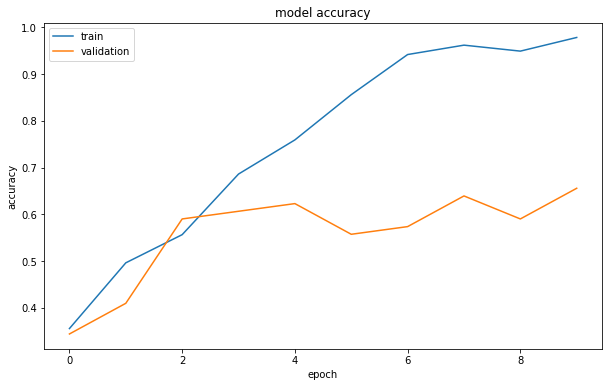

In [ ]:
plt.plot(train_history.history['categorical_accuracy'])
plt.plot(train_history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

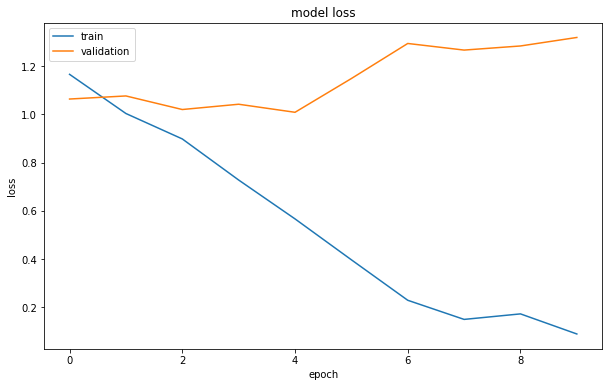

In [ ]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict([test_input_ids,test_attention_masks])

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

Accuracy: 65.36 


Classification Report,
              precision    recall  f1-score   support

         neg       0.66      0.73      0.69        52
     neutral       0.64      0.71      0.67        49
         pos       0.68      0.52      0.59        52

    accuracy                           0.65       153
   macro avg       0.66      0.65      0.65       153
weighted avg       0.66      0.65      0.65       153



Confusion Matrix,


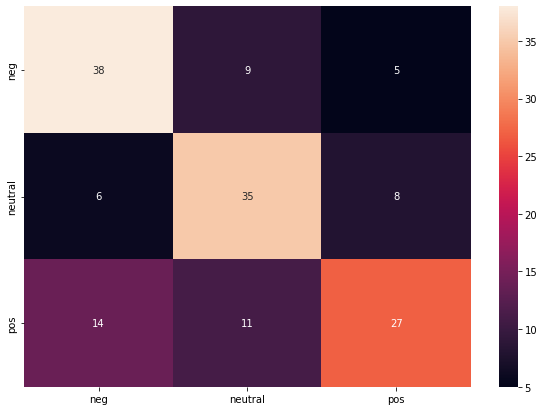

In [ ]:
labels = ['neg', 'neutral', 'pos']

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred) # Also gives the accuracy for the two lists actual and pred
print("Accuracy: %.2lf " % (accuracy*100))

print()
print()
print("Classification Report,")
print(classification_report(y_test,y_pred, target_names=labels))

print()
print()
print("Confusion Matrix,")
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix = pd.DataFrame(cf_matrix, index = labels,
                  columns = labels)
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True)

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_filepath)

# Splitting the data into Train and Test

In [ ]:
newdf=df_nn.copy()

In [ ]:
newdf.head(5)

,text,Polarity
0,RT @DeanObeidallah: I love immigrants but how ...,neg
1,SPREEN STOP DEFENDING ELON MUSK ON UR STREAM O...,neg
2,"Like this, if you love Elon Musk😂 https://t.co...",pos
3,RT @SenTedCruz: In the same week that we got g...,pos
4,Elon Musk arrived to the Met. #MetGala #MetGal...,neutral


In [ ]:
sentimentlabel=newdf.Polarity.factorize()

In [ ]:
sentimentlabel

(array([0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2,
        2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2,
        2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2,
        0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1,
        0, 2, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1,
        1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1,
        0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0,
        0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2,
        2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2,
        1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2,
        1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
        2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 